# <center>TP Nro 1: Programación básica 2021 1C </center>
### Integrantes: Franco Areco - Luna Isaias - Franco Rebora 

Importacion de librerias usadas a lo largo del trabajo:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <u>Ejercicio 1</u>:
Generar una señal discreta, a partir de una señal $x(t)$, de un 1 segundo de duración, compuesta por
tres funciones $x_1(t)+ x_2(t) + x_3(t)$ como se definen a continuación:

$x_1 (t) = 2$ <br>
$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$<br> 
$x_3 (t) = sen(2 \pi f_2 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 0.5kHz$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>


En todos los casos, la frecuencia de muestreo es <b>$f_s = 44.1$kHz </b>. Graficar cada señal por separado y
la señal total.

#### Se definen las variables y se realizan las operaciones:

In [2]:
t = 1
fs = 44100
vector_t = np.linspace(0,t,t*fs)

f2 = 10000
u2 = 0.2
sigma2 = 0.05
exp2 = ((vector_t-u2)**2)/(2*(sigma2**2))

f3 = 500
u3 = 0.7
sigma3 = 0.07
exp3 = ((vector_t-u3)**2)/(2*(sigma3**2))


x1 = 2*np.ones_like(vector_t)
x2 = np.cos(2*np.pi*f2*vector_t)*(np.e**(-exp2))
x3 = np.sin(2*np.pi*f3*vector_t)*(np.e**(-exp3))
x = x1+x2+x3

#### Plot:

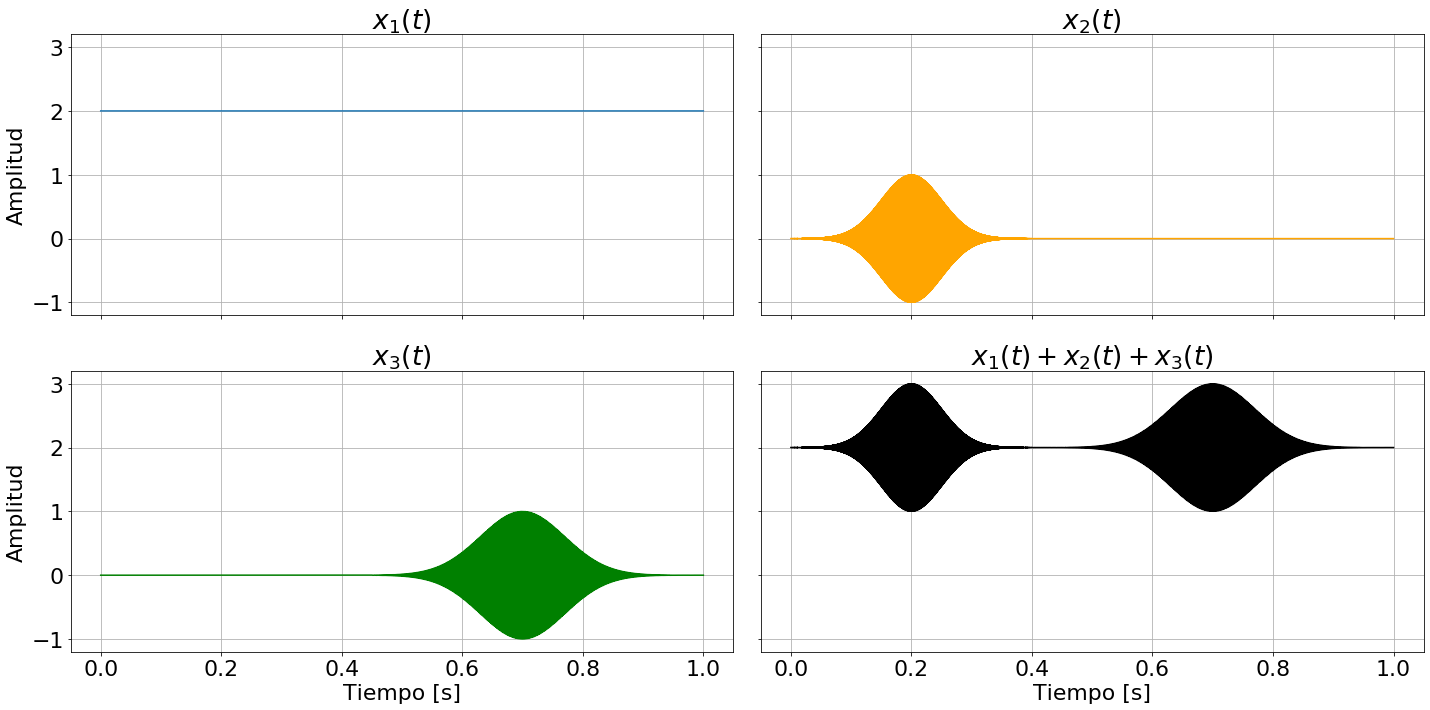

In [3]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[20, 10])
axs[0, 0].plot(vector_t, x1)
axs[0, 0].set_title('$x_1(t)$')
axs[0, 1].plot(vector_t, x2, color='orange')
axs[0, 1].set_title('$x_2(t)$')
axs[1, 0].plot(vector_t, x3, color='green')
axs[1, 0].set_title('$x_3(t)$')
axs[1, 1].plot(vector_t, x, color='black')
axs[1, 1].set_title('$x_1(t) + x_2(t) + x_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(xlabel='Tiempo [s]')


for ax in axs.flat:
    ax.grid()

## <u>Ejercicio 2</u>:
Implementar funciones que permitan calcular el valor medio $\mu$, la desviación respecto del promedio d, la desviación estándar $\sigma$ y el valor RMS de acuerdo a las definiciones dadas debajo para una señal de entrada discreta $x[n]$ de longitud finita $N$. Estas funciones deben estar disponibles para reutilizarse en otros puntos.

Valor medio: $\mu = \frac{1}{N} \sum_{n=0}^{N-1} x[n]$ <br>
Desvío medio: $d = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]-\mu|$ <br>
Desvío estándar: $\sigma = \sqrt{\frac{1}{N-1} \sum_{n=0}^{N-1} |(x[n]-\mu)^2|}\;\;\;\;\;\;\;\;$Varianza:$\sigma^2$<br>
RMS: $\sigma = \sqrt{\frac{1}{N} \sum_{n=0}^{N-1} |(x[n])^2|}$

Aplicar cada una de las funciones anteriores a la señal generada en el punto 1 y mostrar los
resultados.

Se definen las funciones:

In [4]:
def valor_medio(x):
    u = (1/len(x))*np.sum(x)
    return u

def desvio_medio(x):
    N = len(x)
    u = (1/N)*np.sum(x)
    d = (1/N)*np.sum(abs(x-u))
    return d

def desvio_estandar(x):
    N = len(x)
    u = (1/N)*(np.sum(x))
    tau = np.sqrt((1/(N-1))*(np.sum(abs((x-u)**2))))
    return tau 

def rms(x):
    N = len(x)
    rms = np.sqrt((1/N)*np.sum(abs(x**2)))
    return rms
    

In [5]:
t = 1
fs = 44100
vector_t = np.linspace(0,t,t*fs)

f2 = 10000
u2 = 0.2
sigma2 = 0.05
exp2 = ((vector_t-u2)**2)/(2*(sigma2**2))

f3 = 500
u3 = 0.7
sigma3 = 0.07
exp3 = ((vector_t-u3)**2)/(2*(sigma3**2))


x1 = 2*np.ones_like(vector_t)
x2 = np.cos(2*np.pi*f2*vector_t)*(np.e**(-exp2))
x3 = np.sin(2*np.pi*f3*vector_t)*(np.e**(-exp3))

valor1 = valor_medio(x1)
valor2 = valor_medio(x2)
valor3 = valor_medio(x3)

desvio_medio1 = desvio_medio(x1)
desvio_medio2 = desvio_medio(x2)
desvio_medio3 = desvio_medio(x3)

desvio_estandar1 = desvio_estandar(x1)
desvio_estandar2 = desvio_estandar(x2)
desvio_estandar3 = desvio_estandar(x3)

rms1 = rms(x1)
rms2 = rms(x2)
rms3 = rms(x3)

## <u>Ejercicio 3</u>:
Generar señales aleatorias, normalmente distribuidas (Gaussiana), con valor medio nulo y desviación estándar unitaria, para simular una señal de ruido. Calcular para las longitudes (N) dadas en la tabla, la desviación estándar ($\sigma$) en cada caso y determinar la diferencia porcentual($\%$) entre lo calculado y lo esperado ($\sigma$ = 1). Utilizar funciones ya existentes para la generación de las señales aleatorias.

<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>&nbsp; &nbsp; &nbsp; &nbsp;N&nbsp; &nbsp; &nbsp; &nbsp;</b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>$\sigma$</b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>%</b>
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>5</i>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>10</i>
			<br>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp;
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>100</i>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			1000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			10000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			100000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
</table>

In [6]:
v1 = np.random.randn(5)
v2 = np.random.randn(10)
v3 = np.random.randn(100)
v4 = np.random.randn(1000)
v5 = np.random.randn(10000)
v6 = np.random.randn(100000)

d1 = desvio_estandar(v1)
d2 = desvio_estandar(v2)
d3 = desvio_estandar(v3)
d4 = desvio_estandar(v4)
d5 = desvio_estandar(v5)
d6 = desvio_estandar(v6)

p1 = d1*100
p2 = d2*100
p3 = d3*100
p4 = d4*100
p5 = d5*100
p6 = d6*100

print('''Para la cantidad de muestras N = 5:\n
      La desviacion estandar es:''', d1,
      '\n\tCon un porcentaje de: ', round(p1,2), '%\n')
print('''Para la cantidad de muestras N = 10:\n
      La desviacion estandar es:''', d2,
      '\n\tCon un porcentaje de: ', round(p2,2), '%\n')
print('''Para la cantidad de muestras N = 100:\n
      La desviacion estandar es:''', d3,
      '\n\tCon un porcentaje de: ', round(p3,2), '%\n')
print('''Para la cantidad de muestras N = 1000:\n
      La desviacion estandar es:''', d4,
      '\n\tCon un porcentaje de: ', round(p4,2), '%\n')
print('''Para la cantidad de muestras N = 10000:\n
      La desviacion estandar es:''', d5,
      '\n\tCon un porcentaje de: ', round(p5,2), '%\n')
print('''Para la cantidad de muestras N = 100000:\n
      La desviacion estandar es:''', d6,
      '\n\tCon un porcentaje de: ', round(p6,2), '%\n')

Para la cantidad de muestras N = 5:

      La desviacion estandar es: 1.106633495872417 
	Con un porcentaje de:  110.66 %

Para la cantidad de muestras N = 10:

      La desviacion estandar es: 0.9195426543528528 
	Con un porcentaje de:  91.95 %

Para la cantidad de muestras N = 100:

      La desviacion estandar es: 0.9368431127505888 
	Con un porcentaje de:  93.68 %

Para la cantidad de muestras N = 1000:

      La desviacion estandar es: 0.968082165594571 
	Con un porcentaje de:  96.81 %

Para la cantidad de muestras N = 10000:

      La desviacion estandar es: 0.9918653947725428 
	Con un porcentaje de:  99.19 %

Para la cantidad de muestras N = 100000:

      La desviacion estandar es: 1.0007216147630398 
	Con un porcentaje de:  100.07 %



## <u>Ejercicio 4</u>:

A la señal generada en el punto 1 ($x[n]$), sumarle ruido de media cero y desvíos de $\sigma = 0.1$, $\sigma = 1$ y $\sigma =3$ para generar respectivamente tres nuevas señales $x_{0.1}$, $x_1$ y $x_3$. Normalizar y graficar cada una.
Calcular la relación señal a ruido de las nuevas señales. La relación señal a ruido (SNR: Signal to Noise Ratio) se puede calcular con la siguiente definición (hay muchas otras formas de calcularla): <br><br>

<center>$SNR = \frac{Amplitud_{señal}}{\sigma_{ruido}}$</center>

Se suele utilizar un valor de $SNR = 3$ como límite de detección convencional, eso quiere decir que cualquier señal con una relación $SNR$ superior a 3 se puede diferenciar del ruido. En caso que no se pueda medir el ruido por separado de la señal, se debe tratar de medir la desviación estándar del ruido en una zona donde se sepa, o presuma, que no hay señal, en el rango más amplio posible para contar con mayor estadística y mejorar la estimación. Analizar el efecto de la componente de continua en la determinación de la SNR.

In [7]:
def desvio_estandar(x):
    N = len(x)
    u = (1/N)*(np.sum(x))
    tau = np.sqrt((1/(N-1))*(np.sum(abs((x-u)**2))))
    return tau 

In [8]:
# GENERACION DE RUIDO
ruido01 = np.random.normal(loc = 0, scale = 0.1, size = fs*t)
ruido1 = np.random.normal(loc = 0, scale = 1, size = fs*t)
ruido3 = np.random.normal(loc = 0, scale = 3, size = fs*t)

x01 = x + ruido01
x1 = x + ruido1
x3 = x + ruido3

# NORMALIZACION DE SENAL + RUIDO
Nx = x/max(abs(x))
Nx01 = x01/max(abs(x01))
Nx1 = x1/max(abs(x1))
Nx3 = x3/max(abs(x3))


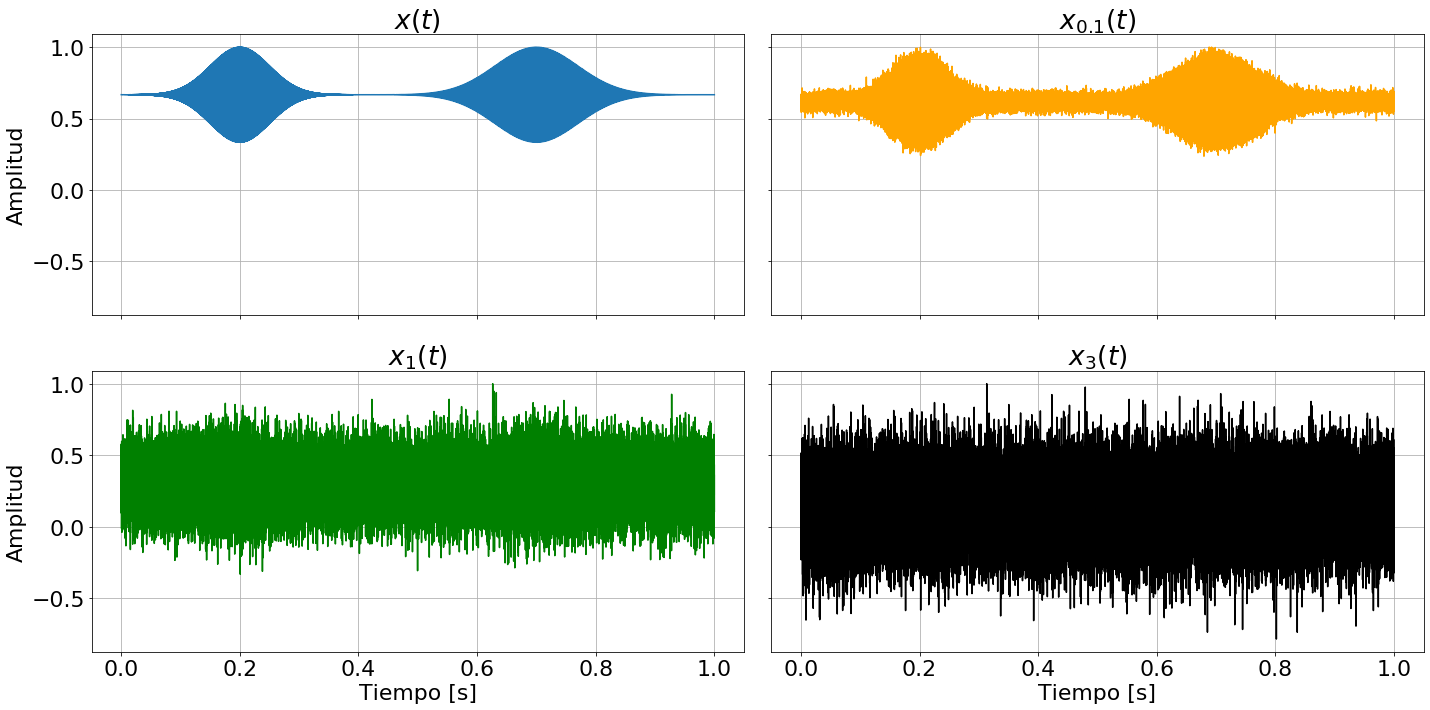

In [12]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[20, 10])
axs[0, 0].plot(vector_t, Nx)
axs[0, 0].set_title(r'$x(t)$')
axs[0, 1].plot(vector_t, Nx01, color='orange')
axs[0, 1].set_title('$x_{0.1}(t)$')
axs[1, 0].plot(vector_t, Nx1, color='green')
axs[1, 0].set_title('$x_1(t)$')
axs[1, 1].plot(vector_t, Nx3, color='black')
axs[1, 1].set_title('$x_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()

In [20]:
SNR_x01= max(x01/desvio_estandar(ruido01))
SNR_x1= max(x1/desvio_estandar(ruido1))
SNR_x3= max(x3/desvio_estandar(ruido3))

print('''\n El SNR para la señal x01 es ''' , round(SNR_x01,2))
print('''\n El SNR para la señal x1 es ''' , round(SNR_x1,2))
print('''\n El SNR para la señal x3 es ''' , round(SNR_x3,2))

#Analizo lo mismo pero sin la componente de continua
xm =  x2 + x3

x01m = xm + ruido01
x1m = xm + ruido1
x3m = xm + ruido3

SNR_x01m = max(x01m/desvio_estandar(ruido01))
SNR_x1m = max(x1m/desvio_estandar(ruido1))
SNR_x3m = max(x3m/desvio_estandar(ruido3))

print('''\n El SNR para la señal x01 sin  la componente de continua es ''' , round(SNR_x01m,2))
print('''\n El SNR para la señal x1 sin  la componente de continua es ''' , round(SNR_x1m,2))
print('''\n El SNR para la señal x3  sin  la componente de continua es ''' , round(SNR_x3m,2))


#Analizo lo mismo pero aumentando el valor de la componente de continua
x_con = 10*np.ones_like(vector_t)
xn = x_con+ x2 + x3

x01n = xn + ruido01
x1n = xn + ruido1
x3n = xn + ruido3

SNR_x01n= max(x01n/desvio_estandar(ruido01))
SNR_x1n= max(x1n/desvio_estandar(ruido1))
SNR_x3n= max(x3n/desvio_estandar(ruido3))

print('''\n El SNR para la señal x01 aumentando la componente de continua de amplitud 10 es ''' , round(SNR_x01m,2))
print('''\n El SNR para la señal x1 aumentando la componente de continua de amplitud 10 es ''' , round(SNR_x1m,2))
print('''\n El SNR para la señal x3  aumentando la componente de continua de amplitud 10 es ''' , round(SNR_x3m,2))


 El SNR para la señal x01 es  32.46

 El SNR para la señal x1 es  6.54

 El SNR para la señal x3 es  4.76

 El SNR para la señal x01 sin  la componente de continua es  144.21

 El SNR para la señal x1 sin  la componente de continua es  14.92

 El SNR para la señal x3  sin  la componente de continua es  8.86

 El SNR para la señal x01 aumentando la componente de continua de amplitud 10 es  144.21

 El SNR para la señal x1 aumentando la componente de continua de amplitud 10 es  14.92

 El SNR para la señal x3  aumentando la componente de continua de amplitud 10 es  8.86


A modo de conclusión, a medida que aumenta la amplitud de la componente de constante continua, se mantiene el valor de SNR.

## <u>Ejercicio 5</u>:
Generar 10 señales de ruido, diferentes entre sí, con media nula y $\sigma = 3$, y sumarlas a la señal del punto 1. Deben quedar 10 señales diferentes con la información de la señal más el ruido. Luego, calcular la señal promedio de todas las señales con el ruido agregado, calcular la relación SNR de la señal promediada y comparar el valor con la obtenida en el punto 3. Volver a repetir el punto con 100 y 1000 señales en el promedio. A esta técnica se la denomina promedio en el ensamble, o simplemente promediado.

## <u>Ejercicio 6</u>:
Se implementará ahora un filtro de media móvil (moving average) que responde a las ecuaciones de respuesta al impulso y relación entrada-salida que se dan a continuación. Esta es una de las tantas implementaciones posibles. Se pide, implementar dos funciones, una directa que se llame xfd = mediamovild(x,M), y otra implementación recursiva [3] xfr = mediamovildr(x,M) que reciben como entrada a la señal x y la longitud de la ventana M del filtrado, y devuelve la señal filtrada xfd o xfr. Comparar los tiempos de ejecución de cada una. <br><br>
<center>
$h[n] = \frac{1}{M+1} \sum_{k=0}^{M} \delta[n+k]\;\;\;\;\;\;\;\;y[n] = \frac{1}{M+1} \sum_{k=0}^{M} x[n+k]$ 
</center>

Una vez implementado, determinar algún valor particular de $M$, explicando el criterio utilizado, para dejar pasar la componente de 0.5 kHz de la señal del punto 1, atenuando al menos un 90% de la señal de 10 kHz. Graficar los resultados.


## <u>Ejercicio 7</u>:

Otra forma de aplicar un filtro es mediante la convolución de la señal con la respuesta al impulso del filtro. Repetir el punto 6 pero realizando el filtrado mediante la operación de convolución lineal con la respuesta al impulso dada en el punto 6. Utilizar el mismo valor de M que se seleccionó en el punto 6. Comparar gráficamente las señales filtradas del punto 6 y 7, con amplitud normalizada (máximo = 1).


## <u>Ejercicio 8</u>:
Repetir el punto 7, pero ahora la ventana a utilizar es una ventana de Blackman: <br><br>
<center>
$v[n] = a_0 + a_1 cos(\frac{2 \pi n}{M - 1})+ a_2 cos(\frac{4 \pi n}{M - 1})$ <br><br>
$a_0 = 0.42 \;\;\;\; a_1 = 0.5 \;\;\;\;\; a_2 = 0.08$
<center>


## <u>Ejercicio 9</u>:
En este punto se abordará el tema de la diferenciación numérica, a través de las diferencias finitas. Una de las formas más sencillas de definir a la derivada df(x)/dx en su versión discreta, en la muestra n, es a través de la diferencia finita de primer orden:<br><br>

<center>$f'[n] = \frac{f[n-1]-f[n]}{x[n-1]-x[n]}$</center>

A partir de esta definición, se pide calcular la derivada discreta de primer orden de la señal definida a continuación $f(t)$, de un 1 segundo de duración, muestreada a 44.1 kHz, compuesta de las siguientes señales (como la del punto 1 pero sin el seno ni el coseno):<br><br>

<center>
$f_1 (t) = 2 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ <br>
$f_2 (t) = e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$<br> 
$f_3 (t) = e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>
</center>

Luego, sumarle a la señal $f(t)$ una señal de ruido blanco (distribución normal) con media nula y $\sigma = 0.01$ y calcularle la derivada discreta de primer orden. Comparar este resultado con el anterior.

## <u>Ejercicio 10</u>:

Convolucionar linealmente la señal "Midi69.wav" con la respuesta al impulso "resp_imp.wav". Luego convolucionar en forma circular las dos señales con un largo igual a la señal respuesta al impulso. Finalmente, calcular con convolución circular modificando las señales de forma tal de que el resultado sea igual a la convolución lineal. En todos los casos, graficar las señales convolucionadas y generar los archivos .wav correspondientes.
